#### Simulate different synthetic signals (sinusoids, square waves, impulses, …).
##### • Compute DFT and analyze frequencies.
##### • Test the different properties of the DFT (linearity, time-shifting, …).
##### • Review the effect of different sampling rates on the DFT.

In [206]:
import numpy as np
import plotly.express as px

In [162]:
def dft(signal: np.ndarray) -> np.ndarray:
    N = len(signal)
    zeta = np.exp(complex(0, -2 * pi / N))

    s_f = []
    for f in range(N):
        s_f_n = np.sum(signal * np.power(zeta, f * np.arange(N)))
        s_f.append(s_f_n)

    return np.array(s_f)

def spectral(signal: np.ndarray, fs) -> None:
    N = len(signal)

    dft_result = dft(signal)
    psd = (abs(dft_result)**2) / N

    freqs = np.arange(N) * fs / N

    half_N = N // 2 + 1

    fig = px.line(
        x=freqs[:half_N],
        y=psd[:half_N],
        labels={'x': 'Frequency (Hz)', 'y': 'Power Spectral Density'}
    )
    fig.show()



#### Sinusoids

In [205]:
pi = np.pi

time = np.arange(0, 2*pi, 0.01)

signal1 = 1 * np.sin( 2*pi*3 * time + 0)
signal2 = 1 * np.sin( 2*pi*6 * time + 0)

signal = signal1 + signal2

fig = px.line(signal)
fig.show()
spectral(signal, 100)

#### Square Wave

In [178]:
def square_wave(time: np.ndarray, freq: float, amplitude: float = 1.0, phase: float = 0.0) -> np.ndarray:
    return amplitude * np.sign(np.sin(2 * np.pi * freq * time + phase))


In [191]:
fig = px.line(square_wave(time, 10.0))
fig.show()
spectral(square_wave(time, 1.0), 100)


### Impulse functions

In [193]:
def impulse(n: int, N: int) -> np.ndarray:
    x = np.zeros(N)
    if 0 <= n < N:
        x[n] = 1.0
    return x

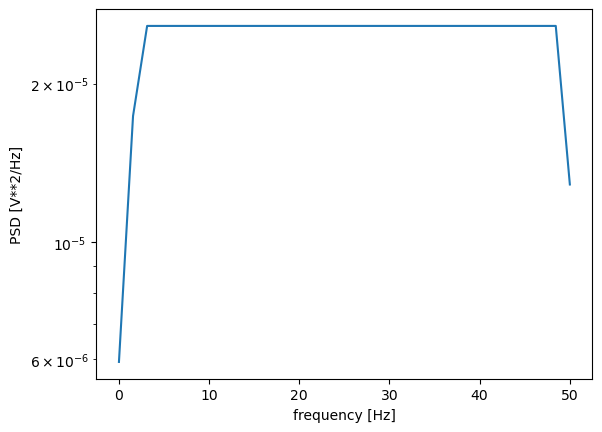

In [220]:
import scipy.signal as s
import matplotlib.pyplot as plt

imp = impulse(n=100, N=1000)
f, psd = s.welch(imp, 100, nperseg=64)

fig = px.line(imp)
fig.show()

plt.semilogy(f, psd)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()